# Assignment #2 - Classification

<font color="red"> <b> Due: Mar 5 (Tuesday) 11:00 pm </b> </font>

<font color="blue"> Anirudh Narayanan </font>

# I. Introduction

This assignment's key goal is to be able to classify datasets, with different methods, and evaluate different methods, after drawing the decision boudnaries. For the different datasets, we use these methods by evaluating the different features. The methods we use are:

1)Pocket Algorithm<br/>
2)Linear Discriminant Analysis<br/>
3)Quadratic Discriminant Analysis<br/>
4)Logistic Regression<br/>

# II. Data

The data represents different weather features in Australia, like weather, temperature, humidity, windspeed etc. This data can be very useful for regression in that, the past can be used to predict how the future weather conditions can be. This data can also be very useful when considering classification, in that places/years can be classified upon, based on the data which they have. A good example is Melbourne Aiport vs Portland's Humidity vs Rainfall which has clear demarcations, and can be used during classifying new data during one of these years, or of future data which is of Rainfall/Humidity during any part of the year.

## Column Pre-Processing
For this process, each of the columns were evaluated with respect to their null values. The reason for this was, removing None values by the row causes issues, in that there may be columns which don't have enough data in them, and hence might have a large percentage of them as None. Due to this, the percentage of null values in each column were evaluated before processing. If the percentage of the column's null values were more than 70%, the entire columns were dropped in lieu of insufficient information.

## Row Pre-Processing
Further, the rows were removed by iteration through the entire data, thereby too many rows were not removed just because some columns had bad information. This had to be done, using a dual loop. Each column had to be iterated for each row iteration. This was because, pandas hashes the information column wise, and not row/dual.

# PLOTS FOR UNDERSTANDING

Below are some plots which can be useful in helping us understand what kinds of data we take into consideration before plotting and using. The data we have with us is being used after feature analysis, and some specific parts of the data have been considered after operations of the data have been done. This has helped in identifying the best and worst parts of the data. The plots are below

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d


df = pd.read_csv("ausweather_preprocessed.csv",sep="\t")

grouped_by_month_rainfall = df.groupby([df.Date.str[:7],"Location"])["Location","MaxTemp","Humidity9am"].mean().reset_index()

#print grouped_by_month_rainfall
grouped_2013 = grouped_by_month_rainfall
grouped_2013 = grouped_by_month_rainfall[ (grouped_2013["Location"]=="Katherine")  | (grouped_2013["Location"]=="Bendigo") ]

#print grouped_2013



plt.figure(figsize=(15,8))
plt.title("Humidity vs Max Temperature of 2 Australian Locations")
plt.xlabel('Humidity', fontsize=18)
plt.ylabel('Max Temperature', fontsize=16)
#EXAMPLE OF A SIMPLE TWO DIVISION CLUSTER. DATA FROM EITHER ONE OF THE SOURCES CAN BE CLASSIFIED TO EITHER ONE BASED ON SOME CLASSIFICATION ALGORITHM
for name,group in grouped_2013.groupby("Location"):
    plt.scatter(group["Humidity9am"],group["MaxTemp"],label=name)
    plt.legend()
 


grouped3d = df.groupby([df.Date.str[:7],"Location"])["Location","MaxTemp","Humidity9am","Rainfall"].mean().reset_index()

grouped3d = grouped3d[grouped3d["Location"]=="Canberra"]

#print grouped3d
plt.figure(figsize=(15,8))
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Max Temperature, Humidity, Rainfall of all years Compared (Unclassifiable)")
ax.set_xlabel('Max Temperature', fontsize=18)
ax.set_ylabel('Humidity 9 am', fontsize=16)
ax.set_zlabel('Rainfall', fontsize=16)
for name,group in grouped3d.groupby(grouped3d.Date.str[:4]):
     ax.scatter(group["MaxTemp"],group["Humidity9am"],group["Rainfall"],label=name)
     ax.legend()

    
grouped3d = grouped3d[grouped3d["Location"]=="Canberra"].reset_index()

grouped3d =  grouped3d[(grouped3d["Date"].str[:4] == "2010") | (grouped3d["Date"].str[:4] == "2008")]

#DATA HERE CAN BE CLASSIFIED BETWEEN 2008 and 2010

#print grouped3d









<Figure size 1080x576 with 0 Axes>

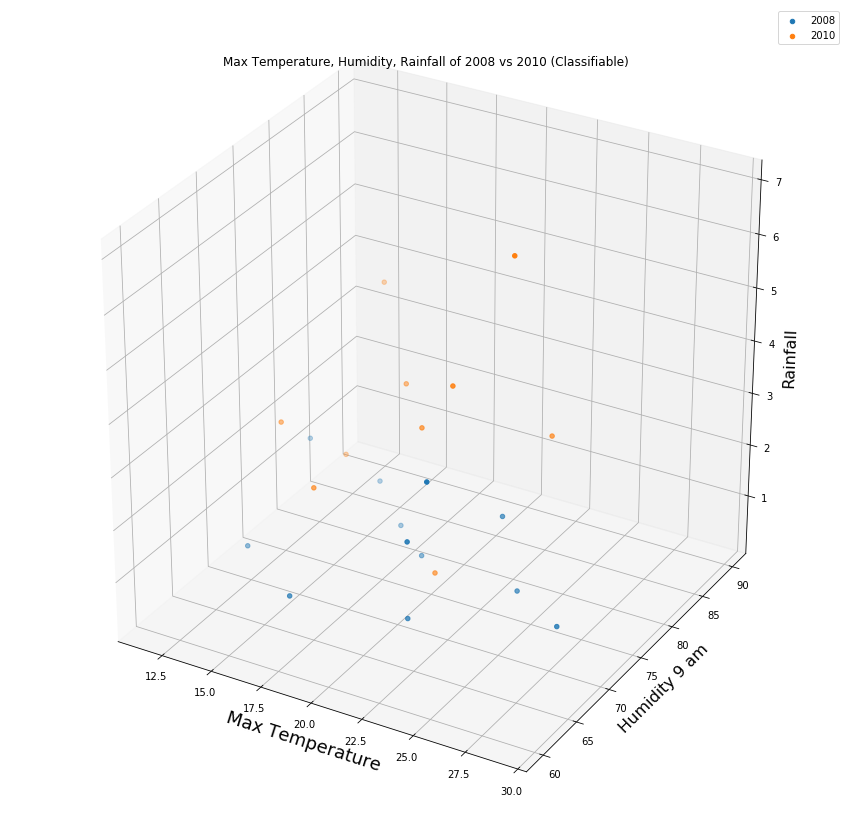

<Figure size 1080x576 with 0 Axes>

In [2]:
plt.figure(figsize=(15,8))
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='3d')

ax.set_title("Max Temperature, Humidity, Rainfall of 2008 vs 2010 (Classifiable)")
ax.set_xlabel('Max Temperature', fontsize=18)
ax.set_ylabel('Humidity 9 am', fontsize=16)
ax.set_zlabel('Rainfall', fontsize=16)
for name,group in grouped3d.groupby(grouped3d.Date.str[:4]):
     ax.scatter(group["MaxTemp"],group["Humidity9am"],group["Rainfall"],label=name)
     ax.legend()


canberra_rainfall_df = df.groupby([df.Date.str[:7],"Location"]).mean().reset_index()[["Humidity3pm","Rainfall","Location"]]
canberra_df_humidity = df.groupby([df.Date.str[:7]]).mean().reset_index()[["Date","Humidity3pm"]]
canberra_df_clouds = df.groupby([df.Date.str[:7]]).mean().reset_index()[["Date","Cloud3pm"]]

#print canberra_rainfall_df[(canberra_rainfall_df["Location"]=="Katherine")  | (canberra_rainfall_df["Location"]=="Bendigo")]
#print canberra_rainfall_df[(canberra_rainfall_df["Location"]=="Portland")  | (canberra_rainfall_df["Location"]=="MelbourneAirport")]
#canberra_rainfall_df = canberra_rainfall_df[(canberra_rainfall_df["Location"]=="Katherine")  | (canberra_rainfall_df["Location"]=="Bendigo")]

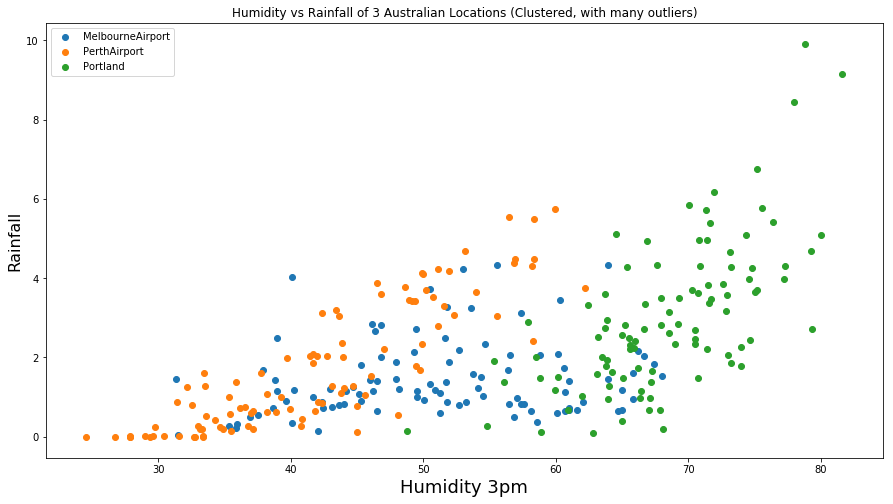

In [3]:
plt.figure(figsize=(15,8))
canberra_rainfall_df = canberra_rainfall_df[(canberra_rainfall_df["Location"]=="Portland")  | (canberra_rainfall_df["Location"]=="MelbourneAirport") | (canberra_rainfall_df["Location"]=="PerthAirport") ]


plt.title("Humidity vs Rainfall of 3 Australian Locations (Clustered, with many outliers)")
plt.xlabel('Humidity 3pm', fontsize=18)
plt.ylabel('Rainfall', fontsize=16)
for name,group in canberra_rainfall_df.groupby("Location"):
    plt.scatter(group["Humidity3pm"],group["Rainfall"],label=name)
    plt.legend()

    
    
plt.show()

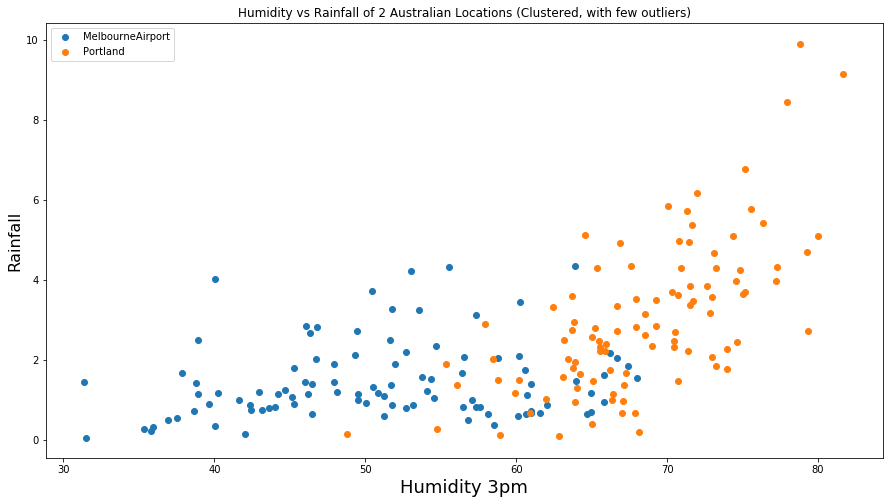

In [4]:
plt.figure(figsize=(15,8))
canberra_rainfall_df = canberra_rainfall_df[(canberra_rainfall_df["Location"]=="Portland")  | (canberra_rainfall_df["Location"]=="MelbourneAirport") ]
plt.title("Humidity vs Rainfall of 2 Australian Locations (Clustered, with few outliers)")
plt.xlabel('Humidity 3pm', fontsize=18)
plt.ylabel('Rainfall', fontsize=16)
for name,group in canberra_rainfall_df.groupby("Location"):
    plt.scatter(group["Humidity3pm"],group["Rainfall"],label=name)
    plt.legend()


plt.show()

In [5]:
grouped_2013['class'] = np.where(grouped_2013['Location']=='Bendigo', 0, 1)

/home/anirudh/Courses/DeepNets/cnn/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [6]:
grouped_2013

,Date,Location,MaxTemp,Humidity9am,class
41,2008-12,Bendigo,24.930000,58.033333,0
55,2009-01,Bendigo,32.864516,42.096774,0
85,2009-02,Bendigo,31.324000,50.880000,0
115,2009-03,Bendigo,26.225000,65.250000,0
145,2009-04,Bendigo,21.151724,63.896552,0
175,2009-05,Bendigo,18.100000,71.586207,0
205,2009-06,Bendigo,13.275000,90.833333,0
235,2009-07,Bendigo,12.796000,87.600000,0
265,2009-08,Bendigo,15.211538,82.538462,0
294,2009-09,Bendigo,17.371429,69.321429,0


# III. Preliminary Observation

Our preliminary observation is that we have found some data which can be very useful, and the best features have been extracted and identified and will be leveraged in our classification problems. As we can see the most useful features are Humdity, Maxtemperature, Rainfall. These have been extensively used with the different classification algorithms. 

# IV. SUMMARY OF CLASSIFICATION ALGORITHMS:

The classification algorithms being used are :

## Logistic Regression:

In logistic regression the primary idea is to be able to use the sigmoid activation function.This function is:<br/>

g(z) = 1/1+e^-z.
<br/>
We use this function in the context of recursively training the data, like in batch gradient descent. In this type of classification, we runt he product of the weights and inputs through the classifier model of logistic regression which does the job of outputting a 0 to 1 value, depending upon whether the value was above or below 0, such that, <br\>

If z > 0 , g(z) >= 0.5
else g(z) < 0.5. The value of course can vary anywhere in between through the sigmoid activation function, and using this we recursively come to a convergence point of getting the perfect results in classifying our data. We tweak the learning rate and the number of iterations in batch regression to the point of getting the convergence.

## Pocket Algorithm

The pocket algorithm, uses a simple and unique method to evaluate the best convergence by keeping in store the best convergence after each iteration. Pocket however doesn't run based on number of iterations, but it rather functions on the data, and works step by step for each row in the data for one iteration, similar to the functioning of stochastic gradient descent. The algorithm used by pocket is called the perceptron algorithm, which runs a single iteration on the large, data set and rounds out the edges of the function, unlike logistic regression. The way this works is <br/>

if z >=0 , then g(z) = 1
if z < 0 , then g(z) = 0

The above algorithm for this value indicates a good accuracy in the case of a large, dataset especially when the pocket is applied and the best possible weights are well preserved. The graph of this function is somewhat different than the logistic regression function, in that it is edges out and sharper, and has categorical outputs directly.

## LDA 

Linear discriminant analysis (LDA) find a linear combination of features that characterizes or separates two or more classes of objects or events. The resulting combination may be used as a linear classifier, or, more commonly, for dimensionality reduction before later classification.

This is done by leveraging the different componenets/features of a given dataset. The method for this uses mean, covariance, scatter matrix. We compute the eigen value and eigen vectors of the different possible features we are presented with, and find out the particular features which can provide us with the best results, and use these in an n dimensional ( where n denotes the number of best features we choose to take with the highest eigenvalues). The eigenvectors of these are leveraged for this process to build a n dimensional low dimensionality data which can best suite our case.

## QDA

QDA is quadratic discriminant analysis. A classifier with a quadratic decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule.The quadratic discriminant analysis primarily leverages the covariances of the data along with the different means in an unfiltered way so as to produce a quadratic (usually a more accurate) boundary between the different datasets provided to us. 

The method by which this is done, is by applying the following formula
<br/>
δk(x)=−0.5ln|Σk|−0.5(x−μk)⊤Σ−1k(x−μk)+lnP(T=k)

When we equate two different classes x, y using δk(x) = δk(y), we obtain our desired decision boundary

# EXPLANATION OF CODES

## Pocket Algorithm

In the pocket algorithm the function being used are step_function,log_likelihood, compare and pocket. 

<br/>

### Step function:
The step function is the evaluation function or g(z) in this case. This does the task of the perceptron, in that it edges out the inputs values . It takes into itself the calculated hypothesis , w.T.dot(X), which is step updated in each iteration. 

<br/>

### Log Likelihood:

The log likelihood function is my estimate of loss/accuracy as the program is evaluated. This is the RECOMMENDED LOSS function in the case of pocket and for logistic regression, and hence this has been used. the log likelihood is evaluated as follows:

l(Θ)=−∑i=1Nyilog(P(Yi=1|X=x;Θ))+(1−yi)log(P(Yi=0|X=x;Θ))

The above is the log likelihood function which has been deployed, and has proven to be most effective for this.


### Compare

The compare function is used in  context of "pocket", in that it evalues two different weights compares them, and returns the best weight possible in the situation. It helps get the best weight, whether or not it is in the current context

### Pocket

The pocket function performs the pocket algorithm call, but it leverages the perceptron training algorithm, wherein it steps through each of the training samples, until the final training dataset, and during the traversal, it changes the weights depending on the step function output and calculates the loss accordingly.

### Graph Function

The graph function is used to plot the decision boundary


### A. Super Classs Definition

In [7]:
import numpy as np
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X-self.meanX)/self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass 

### B. Pocket Algorithm


In [8]:
def step_function(scores):
    return 1 if scores >= 0 else 0

def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

def compare(features,target,w1,w2):
    score1 = np.dot(features,w1)
    score2 = np.dot(features,w2)
    
    return w1 if np.sum(score1 == target) >= np.sum(score2 == target) else w2

def pocket(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1])
    #print(features)
    print(weights)
    best_score = weights
    for step in range(features.shape[0]):
        scores = np.dot(features[step], weights)
        predictions = step_function(scores)        
        
        
        #print(predictions)
        # Update weights with gradient
        output_error_signal = target[step] - predictions
        gradient = np.dot(features[step].T, output_error_signal)
        weights += learning_rate * gradient
        
        best_score = compare(features,target,weights,best_score)
        
        # Print log-likelihood every so often
        if step % 10 == 0:
            print("loss: " + str(log_likelihood(features, target, weights)))
        
    return best_score

In [9]:
#grouped_2013 = canberra_rainfall_df
humid_mean = canberra_rainfall_df["Humidity3pm"].values.mean()
humid_max = canberra_rainfall_df["Humidity3pm"].values.max()
humid_min = canberra_rainfall_df["Humidity3pm"].values.min()
humid = canberra_rainfall_df["Humidity3pm"].values

maxtemp_mean = canberra_rainfall_df["Rainfall"].mean()
maxtemp_max = canberra_rainfall_df["Rainfall"].max()
maxtemp_min = canberra_rainfall_df["Rainfall"].min()
maxtemp = canberra_rainfall_df["Rainfall"].values

for i in range(len(humid)):
    humid[i] = (humid[i] - humid_mean)/(humid_max - humid_min)
    
for i in range(len(maxtemp)):
    maxtemp[i] = (maxtemp[i] - maxtemp_mean)/(maxtemp_max - maxtemp_min)


#logistic_regression(grouped_2013[["Humidity9am","MaxTemp"]].values,grouped_2013["class"],1000,0.01,True)
canberra_rainfall_df["class"] =  np.where(canberra_rainfall_df['Location']=='MelbourneAirport', 0, 1)
maxtemp
feature_data = np.column_stack((humid,maxtemp))
feature_data

array([[-0.56088832, -0.22205927],
       [-0.21663777, -0.2120691 ],
       [-0.47461468, -0.20554156],
       [-0.01540307, -0.2152999 ],
       [-0.30809394, -0.11003831],
       [ 0.11688293, -0.00147624],
       [-0.22954253, -0.10617794],
       [ 0.0548264 ,  0.11062333],
       [-0.02251107, -0.18878505],
       [ 0.26963746, -0.03884276],
       [ 0.09935139, -0.16202465],
       [ 0.30846869,  0.14761494],
       [-0.04674476, -0.14336072],
       [ 0.238344  ,  0.31950883],
       [-0.20158666, -0.1106934 ],
       [ 0.15786987,  0.21387147],
       [-0.23444152, -0.03472516],
       [ 0.07948989,  0.05051197],
       [-0.26253962, -0.16113559],
       [ 0.06817474, -0.0670933 ],
       [-0.39013153,  0.18235922],
       [ 0.06880617,  0.02727394],
       [-0.33311673, -0.10479756],
       [-0.01714667, -0.0757161 ],
       [-0.39879622, -0.13659143],
       [-0.09774453, -0.1991814 ],
       [-0.34334873, -0.15248146],
       [-0.02401343, -0.02325404],
       [-0.27023894,

In [10]:
feature_data[:int(0.8*len(feature_data))]
#int(0.8*len(feature_data))

array([[-0.56088832, -0.22205927],
       [-0.21663777, -0.2120691 ],
       [-0.47461468, -0.20554156],
       [-0.01540307, -0.2152999 ],
       [-0.30809394, -0.11003831],
       [ 0.11688293, -0.00147624],
       [-0.22954253, -0.10617794],
       [ 0.0548264 ,  0.11062333],
       [-0.02251107, -0.18878505],
       [ 0.26963746, -0.03884276],
       [ 0.09935139, -0.16202465],
       [ 0.30846869,  0.14761494],
       [-0.04674476, -0.14336072],
       [ 0.238344  ,  0.31950883],
       [-0.20158666, -0.1106934 ],
       [ 0.15786987,  0.21387147],
       [-0.23444152, -0.03472516],
       [ 0.07948989,  0.05051197],
       [-0.26253962, -0.16113559],
       [ 0.06817474, -0.0670933 ],
       [-0.39013153,  0.18235922],
       [ 0.06880617,  0.02727394],
       [-0.33311673, -0.10479756],
       [-0.01714667, -0.0757161 ],
       [-0.39879622, -0.13659143],
       [-0.09774453, -0.1991814 ],
       [-0.34334873, -0.15248146],
       [-0.02401343, -0.02325404],
       [-0.27023894,

In [11]:
myweights = pocket(feature_data[:int(0.8*len(feature_data))],canberra_rainfall_df["class"].values[:int(0.8*len(feature_data))],1000,0.1,True)
intercept = np.ones((feature_data.shape[0], 1))
myfeatures = np.hstack((intercept,feature_data))
scores = np.dot(myfeatures, myweights)
predictions = []
for i in scores:
    predictions.append(step_function(i))  
#predictions = step_function(scores)

predictions = np.round(predictions)
print(myweights)
print(predictions)
print(type(predictions))


[0. 0. 0.]
loss: -108.83985149613542
loss: -108.48857915484675
loss: -107.8013360105173
loss: -106.70753789815234
loss: -105.62468807158884
loss: -105.53014351216554
loss: -105.42605845806335
loss: -105.42605845806335
loss: -105.18187229546368
loss: -104.21268739441658
loss: -104.63168719591681
loss: -104.63168719591681
loss: -104.26601416345714
loss: -104.15407175231147
loss: -104.15407175231147
loss: -104.1011200132152
[0.         0.40576257 0.12070687]
[0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1
 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1
 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1]
<class 'numpy.ndarray'>


In [12]:
print(myweights)
print(np.dot(myfeatures[0],myweights)) 
def graph(formula, start,end,step):  
    x = np.arange(start,end,step)  
    y = eval(formula)
    plt.plot(x, y)  

[0.         0.40576257 0.12070687]
-0.2543915678809789


[-1  0]
(-0.40576257255592835*x-0.0)/0.12070687324013528
[-1  0]
(-0.40576257255592835*x-0.0)/0.12070687324013528


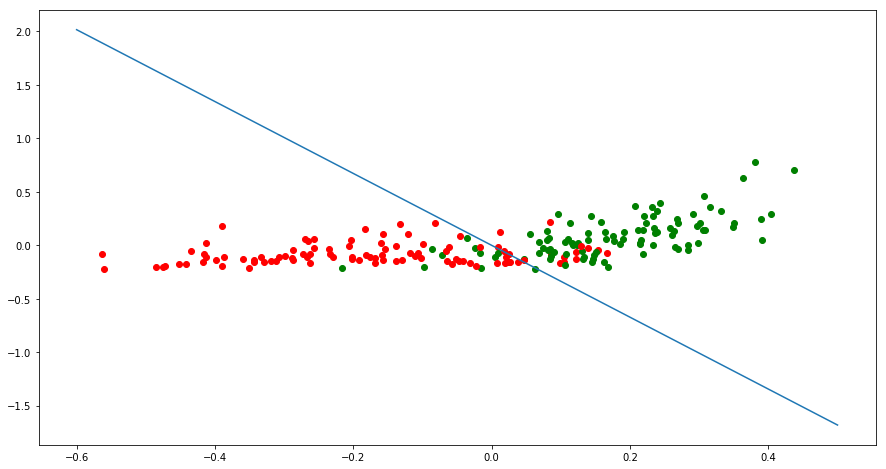

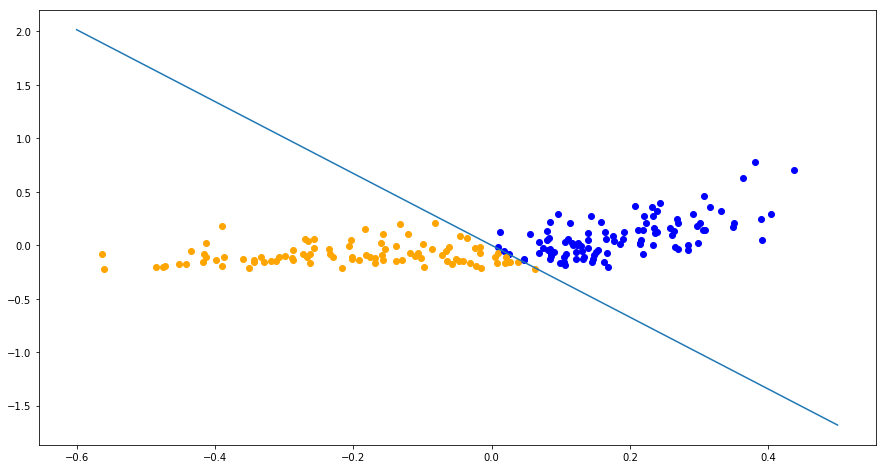

In [16]:
#plt.scatter(humid,maxtemp)
plt.figure(figsize=(15,8))
for i in range(len(canberra_rainfall_df.values)):
    mycolor = "red" if canberra_rainfall_df["class"].values[i]==0 else "green"
    plt.scatter(humid[i],maxtemp[i],color = mycolor)
    
x = y = np.arange(-1, 1)
X, Y = np.meshgrid(x, y)
print(np.array(range(-1,1)))
z1 =  "(-" + str(myweights[1]) + "*x-" + str(myweights[0]) + ")" + "/" + str(myweights[2])
print(z1)
graph(z1,-0.6,0.6,0.1)
    
a = plt.figure(figsize=(15,8))
for i in range(len(humid)):
    #print(grouped_2013["class"].values[i])
    mycolor = "orange" if predictions[i]==0 else "blue"
    plt.scatter(humid[i],maxtemp[i],color = mycolor)


x = y = np.arange(-1, 1)
X, Y = np.meshgrid(x, y)
print(np.array(range(-1,1)))
z1 =  "(-" + str(myweights[1]) + "*x-" + str(myweights[0]) + ")" + "/" + str(myweights[2])
print(z1)
graph(z1,-0.6,0.6,0.1)




In [20]:
myscore = 0

for i in range(len(predictions)):
    if predictions[i] == canberra_rainfall_df["class"].values[i]:
        myscore +=1

print(myscore)
print(len(canberra_rainfall_df))

print("ACCURACY = ")
print(str(myscore*100/len(canberra_rainfall_df)) + "%")

170
198
ACCURACY = 
85.85858585858585%


### C. QDA


## EXPLANATION OF CODES

## Quadratic Discriminant Analysis

### QDA Function:

The QDA function applies the formula for the quadratic discriminant analysis function which predicts the respective output. 
<br/>
δk(x)=−0.5ln|Σk|−0.5(x−μk)⊤Σ−1k(x−μk)+lnP(T=k).
<br/>

The data's values are taken in a variable and initially normalized using it's standard deviation. After normalization, the data is passed through the QDA, function using either of the means and the covariances so as to receive the two different quadratic boundary functions which help us plot the decision boundary, by leveraging the contour function.

For the given data in my dataset, the covariances are calculated using np.cov, the means are calculated, and the lengths. Each of these values are done specifically for each label and for each of the features for each label , so as to give us an n*m matrix, where n is the number of features and m is the number of labels. When this is run through the QDA algorithm, it returns us the boundary representation, given to us by the quadratic function above which we use in the prediction process.

In this case, the rainfall and Humidity graph is being used to differentiate between the two class labels Melbourne Airport and Portland. This dataset contains 99 different data for each class given.

In [ ]:
def QDA(x,mean,cov,p):
    detcov = np.linalg.det(cov)
    invcov = np.linalg.inv(cov)
    logp = np.log(p)
    xminusmean = (x-mean)
    print(xminusmean.shape)
    print(invcov.shape)
    qdareturn = -0.5*np.log(detcov) - 0.5*(xminusmean.dot(invcov).dot(xminusmean.T)) + np.log(p)
    return qdareturn

In [ ]:
Xtrain = canberra_rainfall_df[["Humidity3pm","Rainfall"]].values
canberra_rainfall_df["class"] =  np.where(canberra_rainfall_df['Location']=='MelbourneAirport', -1, 1)
labels = canberra_rainfall_df["class"].values
class1data = Xtrain[labels==-1]
class2data = Xtrain[labels==1]

In [ ]:

N1 = len(class1data)
N2 = len(class2data)
N = len(feature_data)
#ldafeatures[labels==i]
means, stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
Xs = (Xtrain - means) / stds

mu1 = np.mean(class1data, 0)
mu2 = np.mean(class2data, 0)

print(mu1)
print(mu2)

Sigma1 = np.cov(class1data.T)
Sigma2 = np.cov(class2data.T)


prior1 = N1 / N
prior2 = N2 / N

## now compute the discriminant function on test data

xs, ys = np.meshgrid(np.linspace(-3,6, 500), np.linspace(-3,7, 500))
Xtest = np.vstack((xs.flat, ys.flat)).T
XtestS = (Xtrain-means)/stds
d1 = QDA(XtestS, mu1, Sigma1, prior1)
d2 = QDA(XtestS, mu2, Sigma2, prior2)

print(d1)
print(d2)

### D. LDA

# EXPLANATION OF CODES

LDA has been done in numerous steps. Initially the data being used, is one by which we are able to predict which year it is at the moment, 2015, 2016, 2017. We leverage 3 features in our situation which are Max Temperature, Humidity and Rainfall. The 3D plot of this is visible below. Although this may not be the BEST example, this data does definitely help in being able to assess how the LDA works and what it does in terms of dimensionality reduction in classification.

/home/anirudh/Courses/DeepNets/cnn/lib/python3.6/site-packages/ipykernel_launcher.py:36: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


76    24.100000
77    26.258333
78    22.766667
79    18.972222
80    16.050000
81    13.633333
82    10.888889
83    14.006667
84    15.566667
85    21.990000
86    22.525000
87    27.957143
Name: MaxTemp, dtype: float64

<Figure size 1080x576 with 0 Axes>

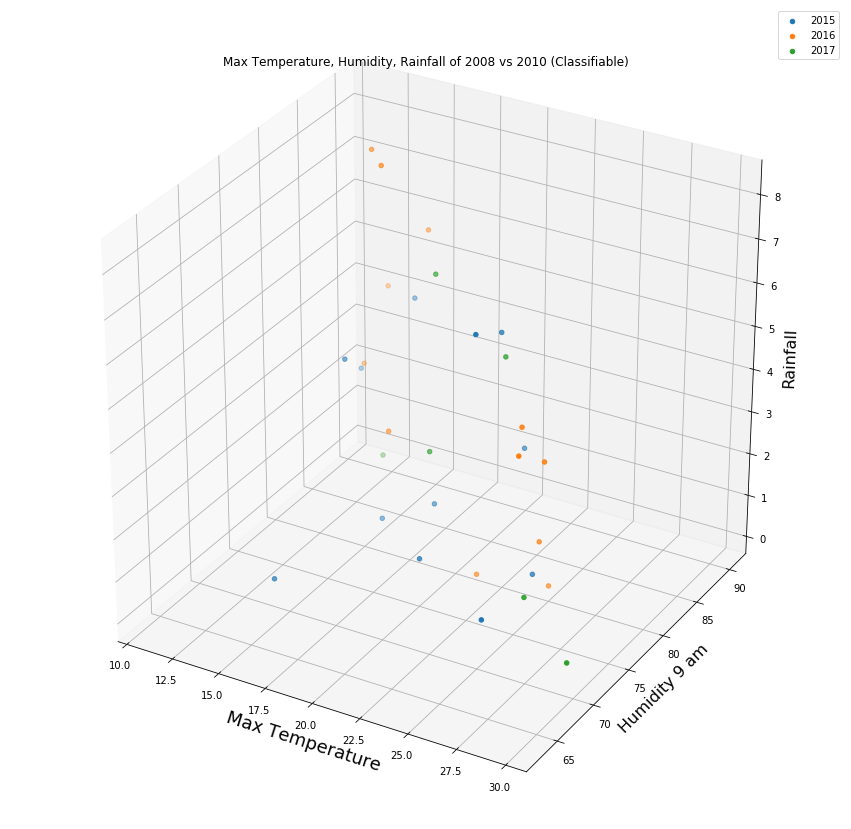

<Figure size 1080x576 with 0 Axes>

In [21]:

grouped3d = df.groupby([df.Date.str[:7],"Location"])["Location","MaxTemp","Humidity9am","Rainfall"].mean().reset_index()

grouped3d = grouped3d[grouped3d["Location"]=="Canberra"]
grouped3d = grouped3d[grouped3d["Location"]=="Canberra"].reset_index()

grouped3d =  grouped3d[(grouped3d["Date"].str[:4] == "2015")| (grouped3d["Date"].str[:4] == "2016") | (grouped3d["Date"].str[:4] == "2017")]
#print grouped3d
plt.figure(figsize=(15,8))
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='3d')

ax.set_title("Max Temperature, Humidity, Rainfall of 2008 vs 2010 (Classifiable)")
ax.set_xlabel('Max Temperature', fontsize=18)
ax.set_ylabel('Humidity 9 am', fontsize=16)
ax.set_zlabel('Rainfall', fontsize=16)


ldafeatures = grouped3d[["MaxTemp","Humidity9am","Rainfall"]].values
#print(ldafeatures)
#grouped3d["labels"] = np.where(grouped3d['Date']=='2015', 1, 2)
grouped3d.loc[(grouped3d['Date'].str[:4] == "2015", 'labels')] = 1
grouped3d.loc[(grouped3d['Date'].str[:4] == "2016", 'labels')] = 2
grouped3d.loc[(grouped3d['Date'].str[:4] == "2017", 'labels')] = 3

labels = grouped3d["labels"].values
#print(labels)
for name,group in grouped3d.groupby(grouped3d.Date.str[:4]):
     ax.scatter(group["MaxTemp"],group["Humidity9am"],group["Rainfall"],label=name)
     
        
     ax.legend()
grouped3d[["MaxTemp","Humidity9am","Rainfall"]][grouped3d["labels"] == 1].ix[:,0]

# Code Explanation

We initially use Histograms to visually assimilate as to which is the best possible way to be able to separate the given data, and which features help us most in this process. Looking at our data, we come to realize that Although none of the 3 histograms are PERFECT, we can see that one of them is significantly better than the others in that at LEAST the peaks are differentiated and visible. We can actualize this when the code is run. and the eventual output is visible.

/home/anirudh/Courses/DeepNets/cnn/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/anirudh/Courses/DeepNets/cnn/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


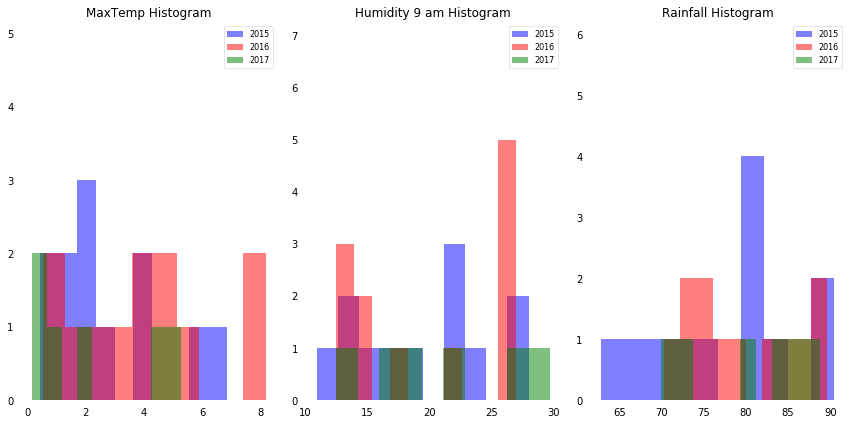

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,6))
import math
labdict = {1:"2015",2:"2016",3:"2017"}
titledict = {1:"MaxTemp Histogram",2:"Humidity 9 am Histogram",3:"Rainfall Histogram"}
for ax,cnt in zip(axes.ravel(), range(4)):  

    # set bin sizes
    min_b = math.floor(np.min(ldafeatures[:,cnt]))
    max_b = math.ceil(np.max(ldafeatures[:,cnt]))
    bins = np.linspace(min_b, max_b, 25)

    # plottling the histograms
    for lab,col in zip(range(1,4), ('blue', 'red', 'green')):
        ax.hist(grouped3d[["MaxTemp","Humidity9am","Rainfall"]][grouped3d["labels"] == lab].ix[:,cnt-1],
                   label=str(labdict[lab]),
                    color = col,
                   alpha=0.5,)
    ylims = ax.get_ylim()

    # plot annotation
    leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
    leg.get_frame().set_alpha(0.5)
    ax.set_ylim([0, max(ylims)+2])
    ax.set_title(titledict[cnt+1])

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    



fig.tight_layout()       

plt.show()

# Code Explanation

The below part of the code computes the D dimensional Mean vectors, which are for each of the different labels, and for each of the different samples in our case, and it has been printed below. 

After this, we compute the scatter matrices, by iterating through the different labels, and the different training features, and subtracting from each row the mean, and finding the relative difference similar to the variance in this case. The way this helps in being able to identify isolate and operate on the data, in being able to calculate the different eigen vectors and values is to be noticed. This process actually can be applied easily to multiple different classes , but in this case there are 3 classes. 

We need to find the center of the data, and then use that to calculate the variance between the different classes, and within the different data points presented to us. Eventually we find the eigen values and eigen vectors of this process, and reduce the dimensionality, to two dimensions and plot it. It may not be the most visibly clear plot to show the process, but it does indeed reduce the dimensionality, and help in classifying this otherwise vague data.

In [23]:
#COMPUTING D DIMENSIONAL MEAN VECTORS

mean_vectors = []

ldafeatures[labels==3]
for i in range(1,4):
    mean_vectors.append(np.mean(ldafeatures[labels==i],axis=0))
    print("Mean Vectors %s are : %s"%(i,mean_vectors[i-1]))
    

Mean Vectors 1 are : [19.55957672 77.30175265  2.74425445]
Mean Vectors 2 are : [19.98417179 79.84621301  4.03008653]
Mean Vectors 3 are : [20.67530303 80.56262626  2.21472222]


In [24]:
#COMPUTING SCATTER MATRICES
S_W = np.zeros((3,3))
for cl,mv in zip(range(1,4), mean_vectors):
    class_sc_mat = np.zeros((3,3))                  # scatter matrix for every class
    for row in ldafeatures[labels == cl]:           #row is each row in the data set with 3 features
        row, mv = row.reshape(3,1), mv.reshape(3,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)    #here mv is the mean vector
    S_W += class_sc_mat                             # sum class scatter matrices
print('Scatter Matrix:\n', S_W)

Scatter Matrix:
 [[ 963.11503418 -972.36097979  -78.72624592]
 [-972.36097979 1543.8193718   127.2533955 ]
 [ -78.72624592  127.2533955   133.96723138]]


In [25]:
overall_mean = np.mean(ldafeatures, axis=0)

#print(enumerate(mean_vectors))

S_B = np.zeros((3,3))

for j,meanv in enumerate(mean_vectors):
    n = ldafeatures[labels==j+1,:].shape[0]   #here we get the number of elements of this particular label
    meanv = meanv.reshape(3,1)
    overall_mean = overall_mean.reshape(3,1)
    S_B += n* (meanv-overall_mean).dot((meanv - overall_mean).T)

print("Between Different Classes our matrix (something like covariance) is:\n", S_B)

Between Different Classes our matrix (something like covariance) is:
 [[ 4.99936689 15.1058609  -1.80852508]
 [15.1058609  57.8282442   8.43890107]
 [-1.80852508  8.43890107 16.51843249]]


In [26]:
# FINDING EIGENVALUES AND EIGENVECTORS FOR THE PROCESS

eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(3,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))


Eigenvector 1: 
[[ 0.92902686]
 [-0.27826882]
 [ 0.24387613]]
Eigenvalue 1: 2.78e-17

Eigenvector 2: 
[[-0.75030183]
 [-0.6610376 ]
 [ 0.00874384]]
Eigenvalue 2: 1.71e-01

Eigenvector 3: 
[[-0.02074609]
 [-0.07636305]
 [ 0.99686423]]
Eigenvalue 3: 1.26e-01


In [27]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

for i in eig_pairs:
    print(i[0])

0.17073498336652887
0.12640970638657004
2.7755575615628914e-17


# Code Explanation

Here , we print out the eigen vectors and choose the two best eigenvectors for the process, which helps us to reduce the dimensionality to 2.

In [28]:
W = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('We are reducing from 3D to 2D by selecting the two best eigenvectors:\n', W.real)

We are reducing from 3D to 2D by selecting the two best eigenvectors:
 [[-0.75030183 -0.02074609]
 [-0.6610376  -0.07636305]
 [ 0.00874384  0.99686423]]


In [29]:
X_lda = ldafeatures.dot(W)
X_lda

array([[-65.61704651,   0.83493093],
       [-68.77220489,  -4.90217615],
       [-71.48456706,  -4.16769661],
       [-66.88716005,  -5.29202812],
       [-64.81139077,  -5.99731692],
       [-70.01891716,  -3.30592373],
       [-67.49914704,  -5.11003072],
       [-63.35761036,  -2.45204508],
       [-55.81396548,  -4.46974297],
       [-62.75620546,  -4.02720155],
       [-69.48626522,  -0.91543049],
       [-62.50699476,  -3.07293576],
       [-68.03662148,  -1.41133894],
       [-69.56034933,  -4.49133429],
       [-70.55023494,  -5.89673387],
       [-67.28113786,  -5.74973816],
       [-70.023072  ,  -1.25888674],
       [-66.68196375,   1.00238906],
       [-68.60531641,  -2.94602279],
       [-66.05427002,  -3.83115456],
       [-65.76445669,   1.54843783],
       [-64.67800241,  -3.5699555 ],
       [-66.67222491,  -1.21148415],
       [-68.97560885,  -2.11751232],
       [-68.47936286,  -5.55550723],
       [-67.98015794,  -5.14818204],
       [-71.32092883,  -2.56572236],
 

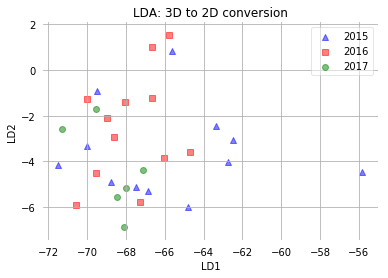

In [30]:
def plot_step_lda():

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_lda[:,0].real[labels == label],
                y=X_lda[:,1].real[labels == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=labdict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: 3D to 2D conversion')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()



### Finally we have plotted the data, and thereby we can see that the dimensionality reduction has helped in being able to make some sense of the major portions of the data

### E. Logistic Regression


## Logistic Regression
In the Logistic Regression algorithm the function being used are sigmoid,log_likelihood,logistic regression . 

<br/>

### Sigmoid Function:
The sigmoid is the evaluation function or g(z) in this case. This does the task of 1/1+e^-z. . It takes into itself the calculated hypothesis , w.T.dot(X), which is step updated in each iteration. 

<br/>

### Log Likelihood:

The log likelihood function is my estimate of loss/accuracy as the program is evaluated. This is the RECOMMENDED LOSS function in the case of pocket and for logistic regression, and hence this has been used. the log likelihood is evaluated as follows:

l(Θ)=−∑i=1Nyilog(P(Yi=1|X=x;Θ))+(1−yi)log(P(Yi=0|X=x;Θ))

The above is the log likelihood function which has been deployed, and has proven to be most effective for this.

### Logistic Regression.

The Logistic Regression function performs the pocket algorithm call, but it leverages the sigmoid training function, wherein it steps through each of the training samples, a certain number of times specified. The number of times is specified up until a good accuracy is received. We also toggle the learning rate, which we also input in this case to the function. 

### Graph Function

The graph function is used to plot the decision boundary

In [31]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

In [32]:
def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

In [33]:
def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1])
    print(features)
    print(weights)
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)
        
        #print(predictions)
        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient
        
        # Print log-likelihood every so often
        if step % 100 == 0:
            print("loss: " + str(log_likelihood(features, target, weights)))
        
    return weights

In [34]:
humid_mean = grouped_2013["Humidity9am"].values.mean()
humid_max = grouped_2013["Humidity9am"].values.max()
humid_min = grouped_2013["Humidity9am"].values.min()
humid = grouped_2013["Humidity9am"].values

maxtemp_mean = grouped_2013["MaxTemp"].mean()
maxtemp_max = grouped_2013["MaxTemp"].max()
maxtemp_min = grouped_2013["MaxTemp"].min()
maxtemp = grouped_2013["MaxTemp"].values

for i in range(len(humid)):
    humid[i] = (humid[i] - humid_mean)/(humid_max - humid_min)
    
for i in range(len(maxtemp)):
    maxtemp[i] = (maxtemp[i] - maxtemp_mean)/(maxtemp_max - maxtemp_min)


#logistic_regression(grouped_2013[["Humidity9am","MaxTemp"]].values,grouped_2013["class"],1000,0.01,True)
maxtemp
feature_data = np.column_stack((humid,maxtemp))
feature_data

array([[-0.23774578,  0.04280142],
       [-0.52095449,  0.32524299],
       [-0.36486772,  0.2704059 ],
       [-0.10949834,  0.08889898],
       [-0.13355048, -0.09169225],
       [ 0.00310245, -0.20032317],
       [ 0.34514328, -0.37207663],
       [ 0.28768369, -0.38912739],
       [ 0.19773505, -0.3031425 ],
       [-0.03714495, -0.22625782],
       [-0.11723201, -0.12662508],
       [-0.38479576,  0.22217132],
       [-0.43381923,  0.18411981],
       [-0.37624116,  0.28222396],
       [-0.17862756,  0.22242172],
       [ 0.00124137,  0.05425824],
       [ 0.04409395, -0.07687934],
       [ 0.15030607, -0.24690825],
       [ 0.26852191, -0.38016324],
       [ 0.32366998, -0.40300115],
       [ 0.21512895, -0.39549058],
       [ 0.00677921, -0.29189228],
       [-0.01834532, -0.12188796],
       [-0.10860979, -0.00762706],
       [-0.1035236 ,  0.04578417],
       [-0.10979452,  0.16964387],
       [ 0.04213472,  0.09450931],
       [ 0.01967056, -0.02985514],
       [ 0.14564256,

In [35]:
myweights = logistic_regression(feature_data[:int(0.8*len(feature_data))],grouped_2013["class"].values[:int(0.8*len(feature_data))],1000,0.01,True)
intercept = np.ones((feature_data.shape[0], 1))
myfeatures = np.hstack((intercept,feature_data))
scores = np.dot(myfeatures, myweights)
predictions = sigmoid(scores)
predictions = np.round(predictions)
print(predictions)



[[ 1.         -0.23774578  0.04280142]
 [ 1.         -0.52095449  0.32524299]
 [ 1.         -0.36486772  0.2704059 ]
 [ 1.         -0.10949834  0.08889898]
 [ 1.         -0.13355048 -0.09169225]
 [ 1.          0.00310245 -0.20032317]
 [ 1.          0.34514328 -0.37207663]
 [ 1.          0.28768369 -0.38912739]
 [ 1.          0.19773505 -0.3031425 ]
 [ 1.         -0.03714495 -0.22625782]
 [ 1.         -0.11723201 -0.12662508]
 [ 1.         -0.38479576  0.22217132]
 [ 1.         -0.43381923  0.18411981]
 [ 1.         -0.37624116  0.28222396]
 [ 1.         -0.17862756  0.22242172]
 [ 1.          0.00124137  0.05425824]
 [ 1.          0.04409395 -0.07687934]
 [ 1.          0.15030607 -0.24690825]
 [ 1.          0.26852191 -0.38016324]
 [ 1.          0.32366998 -0.40300115]
 [ 1.          0.21512895 -0.39549058]
 [ 1.          0.00677921 -0.29189228]
 [ 1.         -0.01834532 -0.12188796]
 [ 1.         -0.10860979 -0.00762706]
 [ 1.         -0.1035236   0.04578417]
 [ 1.         -0.10979452

In [36]:
print(myweights)
print(np.dot(myfeatures[0],myweights)) 
def graph(formula, start,end,step,a):  
    x = np.arange(start,end,step)  
    y = eval(formula)
    plt.plot(x, y)  

[-3.78464368  1.05412145 14.77244941]
-3.4029748136093243


In [37]:
np.arange(-1,1,0.1)

array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01])

[-1  0]
(-1.0541214522830824*x--3.7846436762808127)/14.772449407760725
[-1  0]
(-1.0541214522830824*x--3.7846436762808127)/14.772449407760725


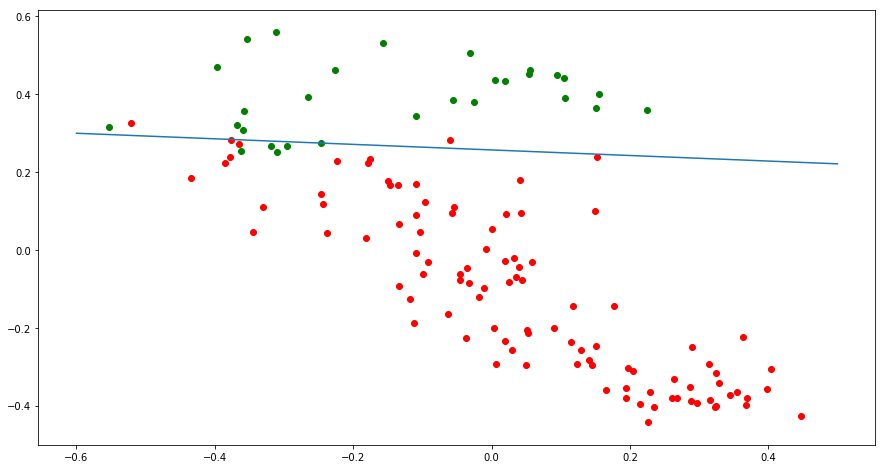

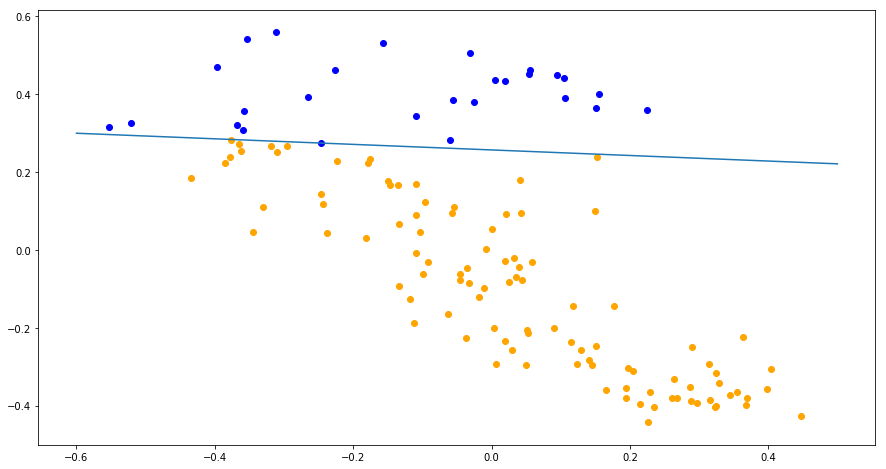

In [38]:
#plt.scatter(humid,maxtemp)
plt.figure(figsize=(15,8))
for i in range(len(humid)):
    #print(grouped_2013["class"].values[i])
    mycolor = "red" if grouped_2013["class"].values[i]==0 else "green"
    plt.scatter(humid[i],maxtemp[i],color = mycolor)
    
x = y = np.arange(-1, 1)
X, Y = np.meshgrid(x, y)
print(np.array(range(-1,1)))
z1 =  "(-" + str(myweights[1]) + "*x-" + str(myweights[0]) + ")" + "/" + str(myweights[2])
print(z1)
graph(z1,-0.6,0.6,0.1,a)
    
a = plt.figure(figsize=(15,8))
for i in range(len(humid)):
    #print(grouped_2013["class"].values[i])
    mycolor = "orange" if predictions[i]==0 else "blue"
    plt.scatter(humid[i],maxtemp[i],color = mycolor)


x = y = np.arange(-1, 1)
X, Y = np.meshgrid(x, y)
print(np.array(range(-1,1)))
z1 =  "(-" + str(myweights[1]) + "*x-" + str(myweights[0]) + ")" + "/" + str(myweights[2])
print(z1)
graph(z1,-0.6,0.6,0.1,a)


In [39]:
myscore = 0
for i in range(len(predictions)):
    if predictions[i] == grouped_2013["class"].values[i]:
        myscore +=1
        
print(myscore)
print(len(predictions))

print("ACCURACY : %s"%str(myscore*100/len(predictions)) + "%")

123
129
ACCURACY : 95.34883720930233%


In [40]:
humid_mean = grouped_2013["Humidity9am"].values.mean()
humid_max = grouped_2013["Humidity9am"].values.max()
humid_min = grouped_2013["Humidity9am"].values.min()
humid = grouped_2013["Humidity9am"].values

maxtemp_mean = grouped_2013["MaxTemp"].mean()
maxtemp_max = grouped_2013["MaxTemp"].max()
maxtemp_min = grouped_2013["MaxTemp"].min()
maxtemp = grouped_2013["MaxTemp"].values

for i in range(len(humid)):
    humid[i] = (humid[i] - humid_mean)/(humid_max - humid_min)
    
for i in range(len(maxtemp)):
    maxtemp[i] = (maxtemp[i] - maxtemp_mean)/(maxtemp_max - maxtemp_min)


#logistic_regression(grouped_2013[["Humidity9am","MaxTemp"]].values,grouped_2013["class"],1000,0.01,True)

In [41]:
humid

array([-0.23774578, -0.52095449, -0.36486772, -0.10949834, -0.13355048,
        0.00310245,  0.34514328,  0.28768369,  0.19773505, -0.03714495,
       -0.11723201, -0.38479576, -0.43381923, -0.37624116, -0.17862756,
        0.00124137,  0.04409395,  0.15030607,  0.26852191,  0.32366998,
        0.21512895,  0.00677921, -0.01834532, -0.10860979, -0.1035236 ,
       -0.10979452,  0.04213472,  0.01967056,  0.14564256,  0.26385738,
        0.26067176,  0.14125059, -0.11203705, -0.03243957, -0.13434484,
       -0.3297319 , -0.37860217, -0.1351296 ,  0.03251653, -0.04603045,
        0.12987714,  0.19483017,  0.29692461,  0.16575912,  0.04980606,
        0.11486064, -0.18147092, -0.09617008,  0.04007431,  0.15504735,
        0.05869156, -0.02508605,  0.32441044, -0.10875788,  0.32855701,
       -0.35878608,  0.39887943, -0.31883035,  0.35476925, -0.35779881,
        0.12419042, -0.22583262,  0.01934147, -0.31139673, -0.06224361,
       -0.03100972, -0.03619293,  0.05556699, -0.34496419,  0.10

In [ ]:
maxtemp
feature_data = np.column_stack((humid,maxtemp))
feature_data

In [ ]:
logistic_regression(feature_data,grouped_2013["class"].values,50000,0.1,True)

# IV. Experiments


##  Train and Test Accuracies:

The train accuracy is measured using log likelihood and the percentage metrics, and the test accuracy is measured only using the percentage of success metric. The success has been good for logistic regression and pocket algorithm , where they achieved 90 % and 85 % respectively.

## Evaluation Metrics:

The following evaluation metrics were used:

### Log likelihood

The log likelihood function is said to be one of the best indicators of the cost / loss function which indicates the accuracy of the given mode, and since this is the loss, and the gradient itself was derived from it , this has been used as an indicator of progress in these models. We can even visualize how the loss goes down in logistic regression from a high loss of say 92 to a low loss of 11, this is an indication of a working metric. 

In pocket function too, this is one of the working metrics as we have and can visualize. This along with the percentage of success is the estimator used.

### Percentage of success

The percentage estimator is one in which we divide the data into train and test (80% train and 100% test), the reason it is done this way is because 80% of the data is used to train, and when the entire data is used to test, it not only evaluates based on what it has trained upon, but also on new data, and the entire accuracy of this is done using:

myscore = myprediction == true prediction
accuracy = (myscore/total_samples)*100 %

This is the simplest, but tells periodically a lot about the data we have used and how using our classification has helped.

# Classification and Model Comparison

We can assimilate the following from our data and from the classification approach which we have used:

For different kinds of data different classification approaches can be beneficial, and will help when used. In our first example we are doing a binary classification of two different features plotting it on a 2D graph to visualize and we have obtained a good accuracy using the pocket perceptron training algorith, which edges out and gives a harsh yes or no to the data, during training itself. For this clearly visibly separable data, this is a good option. 

<br/>
In the case of a larger more complex data set which is multi dimensional in nature, plotting and visualizing is a tough task. Additionally we cannot find much about the data just by examining it individually with pairs of components. This becomes similar to an unsupervised learning problem, wherein even though we may have labels, finding the right fit for the data will become considerably harder. LDA and QDA are the very good uses in this case. When the dimensionality is high, we apply say LDA to our data, and by this we take into consideration different possible relations to our data using the different matrix operations like covariance, and mean. These along with the scatter matrices give a good idea about the data using the following eigenvalue and it's corresponding eigenvector. We take the highest eigenvalue, and we notice that when the eigenvalue is high enough, the more information about the data that we have. This information can be visible to us and can be graphed by us using the eigen vectors. In the second case of QDA, we notice that applying it regular data gives us good results too.
<br/>

In LDA, we kind of linearize a larger dimension data set we have to identify the best possible features using the process mentioned above and thereby get the best possible results. This however is not the best for data which cannot be easily linearly separable or even for smaller clearly visible data sets, for which logistic regression with sigmoid function could be the best solution for. 

Logistic regression is the best on smaller datasets with a clear demarcation, as the way it functions, it takes in input the learning rate and iterations, and with a smaller data set a large number of iterations can be leveraged to get better results as this helps in being able to best fit the data, but we need to beware of overfitting if the wrong features and the wrong model to execute is chosen for this process. A good accuracy in our case was obtained in the case of logistic regression as well. This can be clearly visible by the graph which is very close to accurate. Thus we understand that each of the methods have their own advantage in being able to tell us classifiable information and actually classifying the data itself.

The gaussian fitting methods are useful for multimensional yet , non-visibly classifiable information, and the logistic and perceptron-based pocket methods are for the other kinds of small dimension data.

# Conclusions

The classification was done using different algorithms. The learning was that each algorithm has it's place in the entire chain. The best learning algorithms have methods of not funcitioning well in the wrong places, and the takeaway in this case was that larger complex datasets can use a gaussian based method , which can reduce dimensionality and help better fit, but simpler well distinguished datasets don't need that and can definitely suffice with logistic or pocket fitting. 

# References

[1] https://en.wikipedia.org/wiki/Linear_discriminant_analysis
[2] https://medium.com/journey-2-artificial-intelligence/lda-linear-discriminant-analysis-using-python-2155cf5b6398
[3] https://www.coursera.org/courses?query=machine%20learning%20andrew%20ng
[4] https://towardsdatascience.com/gaussian-discriminant-analysis-an-example-of-generative-learning-algorithms-2e336ba7aa5c

# Extra Credit

* [OPT 1] Search for a ordinal data set and apply your classifiers to it. 
  - Repeat the experiments on it. 
  - Do you have different observation from previous results? 
  - Were you able to observe that we discussed in class about logistic regression? 
  - For a full extra credit point, you need to discuss all bullet points in Results section.     


* [OPT 2] Partition your data into five sets. Selecting one test set and the other for training, repeat your experiments and observe/analyze the 5 different training/testing errors.  

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes.

To help our TA's grading, please make an explicit section for each grading criteria. 
Again, this is a **writing assignment**. Please don't forget to properly explain your codes and results using Markdown cell. 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
15 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
25 | Methods | 
 |10| Summary of Classification models
 | 5| Explanation of codes
 |10| Pocket, LDA, QDA, Logistic Regression
40 | Experiments 
| 5| Discussion about evaluation metrics
| 5| Discussion about train and test accuracies
|20| plots for results (5 for each algorithm)
|10| Discussions about classificaion model comparison
5 | |Conclusions 
5 | |Referemces
5 | |Grammar and spelling error (Proofread please)